In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

filename = r"C:\Users\Dell\Downloads\netflix_titles.csv\netflix_titles.csv"
df = pd.read_csv(filename)

print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [2]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [3]:
df.drop(columns=['show_id'], inplace = True)

In [4]:
df['director'] = df['director'].fillna("Unknown")
df.dropna(subset=['title'], inplace=True)




In [5]:
df['cast'] = df['cast'].fillna("")


In [6]:
df['country'] = df['country'].fillna("Unknown")


In [7]:
df['date_added'] = df.apply(
    lambda row: pd.Timestamp(f"{row['release_year']}-01-01") if pd.isnull(row['date_added']) else row['date_added'],
    axis=1
)


In [8]:
df['date_added'] = pd.to_datetime(df['date_added'],errors = 'coerce')

In [9]:
print(df['date_added'])

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]


In [10]:
df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s+(\w+)')
df['duration_int'] = df['duration_int'].astype(float)

In [11]:
print(df['duration'])

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object


In [12]:
df.isnull().sum()

type              0
title             0
director          0
cast              0
country           0
date_added       88
release_year      0
rating            4
duration          3
listed_in         0
description       0
duration_int      3
duration_type     3
dtype: int64

In [13]:
df['rating'] = df['rating'].fillna("Unknown")


In [14]:
df['date_added'] = pd.to_datetime(df['date_added'],errors = 'coerce')

In [15]:
df.isnull().sum()

type              0
title             0
director          0
cast              0
country           0
date_added       88
release_year      0
rating            0
duration          3
listed_in         0
description       0
duration_int      3
duration_type     3
dtype: int64

In [16]:
df = df.dropna(subset=['date_added'])


In [17]:
df.isnull().sum()

type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         3
listed_in        0
description      0
duration_int     3
duration_type    3
dtype: int64

In [18]:
df = df.dropna(subset=['duration'])


In [19]:
df.isnull().sum()

type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
duration_int     0
duration_type    0
dtype: int64

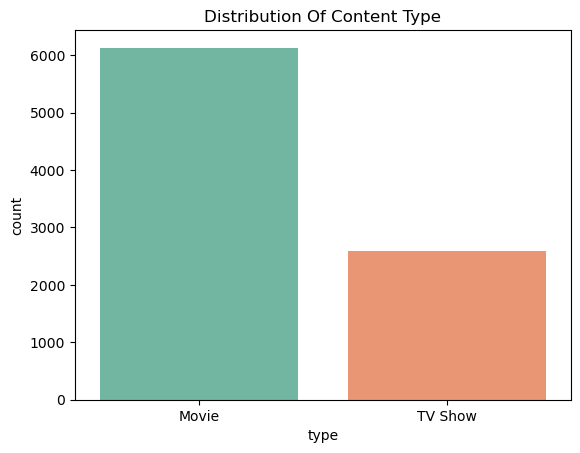

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type',hue='type',palette='Set2',legend=False)
plt.title('Distribution Of Content Type')
plt.show()

In [21]:
df['year_added'] = df['date_added'].dt.year


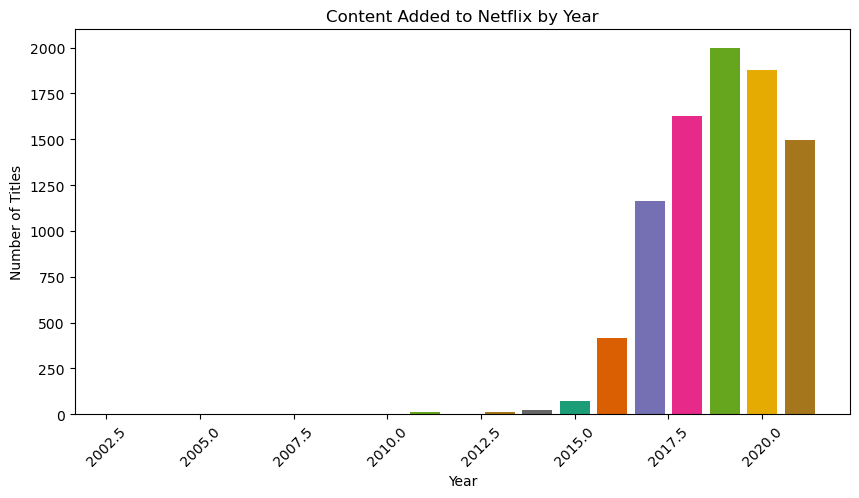

In [22]:
year_counts = df['date_added'].dt.year.value_counts().sort_index()
colors = plt.cm.Dark2.colors  # Set2 palette with multiple colors

plt.figure(figsize=(10, 5))
plt.bar(year_counts.index, year_counts.values, color=colors[:len(year_counts)])
plt.title('Content Added to Netflix by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


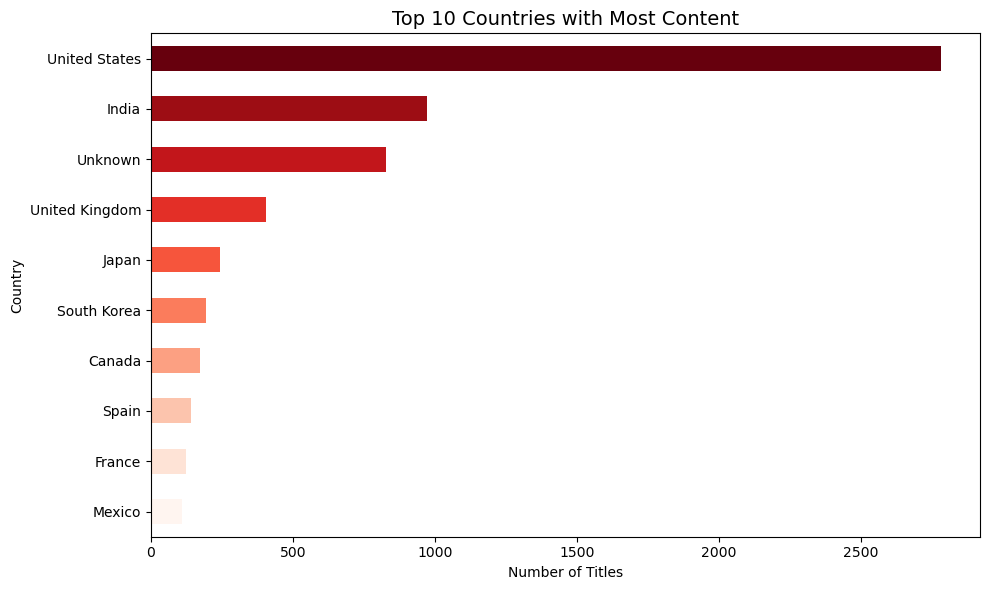

In [23]:

import matplotlib.colors as mcolors

top_countries = df['country'].value_counts().head(10)


colors = plt.cm.Reds([i / (len(top_countries) - 1) for i in range(len(top_countries))])

colors = colors[::-1]


plt.figure(figsize=(10, 6))
top_countries.plot(kind='barh', color=colors)
plt.title('Top 10 Countries with Most Content', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


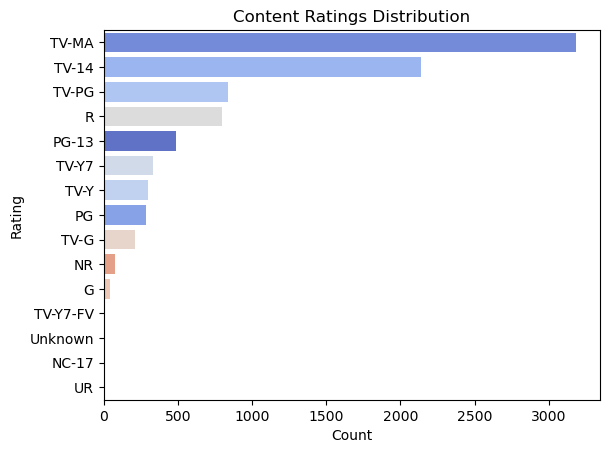

In [24]:
sns.countplot(data=df, y='rating',hue='rating', order=df['rating'].value_counts().index, palette='coolwarm')
plt.title('Content Ratings Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


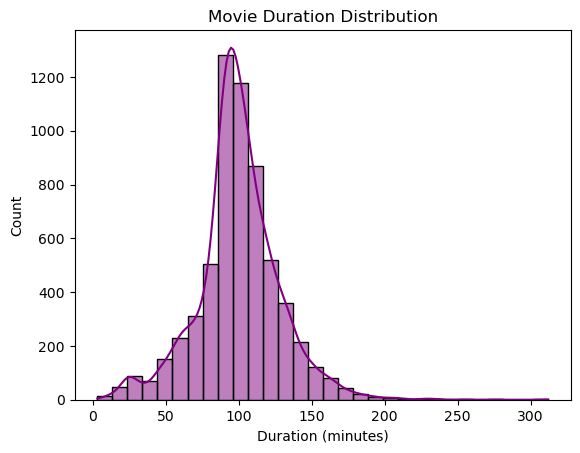

In [25]:
movies = df[df['type'] == 'Movie']
sns.histplot(data=movies, x='duration_int', bins=30, kde=True, color='purple')
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.show()


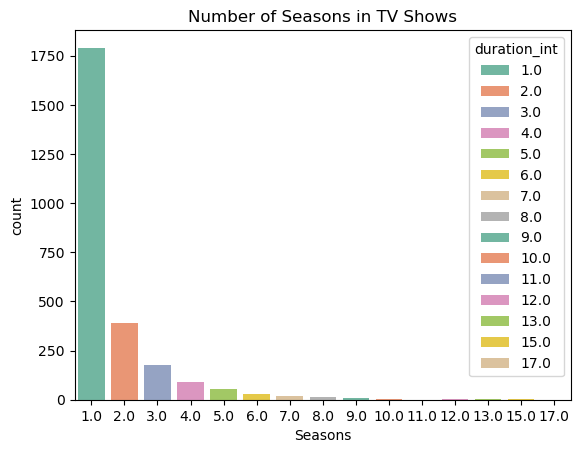

In [26]:
tv_shows = df[df['type'] == 'TV Show']
sns.countplot(data=tv_shows, x='duration_int',hue='duration_int', palette='Set2')
plt.title('Number of Seasons in TV Shows')
plt.xlabel('Seasons')
plt.show()


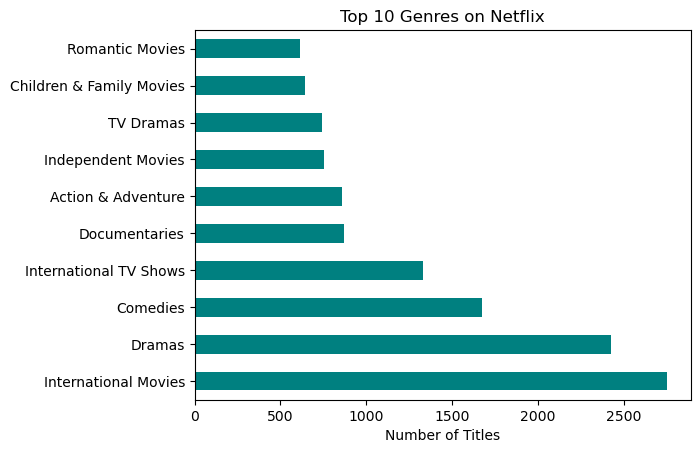

In [27]:
from collections import Counter

# Split and flatten genres
genres = df['listed_in'].str.split(', ')
flat_genres = [genre for sublist in genres for genre in sublist]
genre_counts = pd.Series(Counter(flat_genres)).sort_values(ascending=False)

# Top 10 genres
genre_counts.head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.show()


In [28]:
#Start Feature Engineering Part On Duration

df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [29]:
df[['duration_num', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_num'] = df['duration_num'].astype(float)


In [30]:
df['duration_type'] = df['duration_type'].replace({'Season': 'Seasons'})


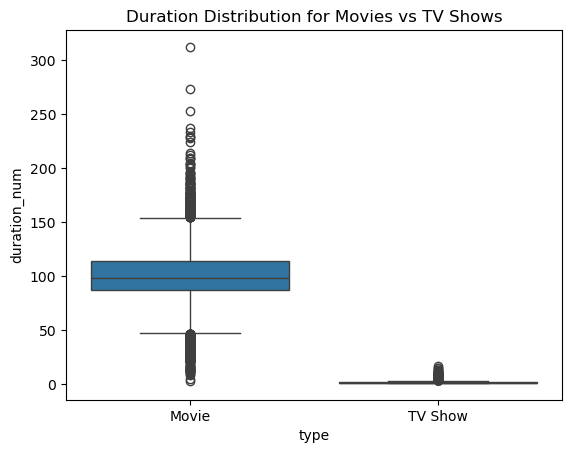

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='type', y='duration_num', data=df)
plt.title('Duration Distribution for Movies vs TV Shows')
plt.show()


In [32]:
df['is_movie_based_on_duration'] = df['duration_type'].apply(lambda x: 1 if x == 'min' else 0)


In [66]:
# Fill missing genres with empty string
df['listed_in'] = df['listed_in'].fillna('')

# Convert comma-separated genres into a list
df['genre_list'] = df['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])


In [68]:
from sklearn.preprocessing import MultiLabelBinarizer

# One-hot encode genre list
mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(df['genre_list']), columns=mlb.classes_)

# Merge new genre columns with original df
df = pd.concat([df, genre_dummies], axis=1)


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill empty descriptions
df['description'] = df['description'].fillna('')

# Convert description text into TF-IDF vectors (1000 most important words)
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['description'])

# Optional: Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())


In [73]:
df['rating'] = df['rating'].fillna('Unknown')

# Binary feature: 1 = Kids content, 0 = not
kids_ratings = ['G', 'TV-G', 'TV-Y', 'TV-Y7', 'TV-Y7-FV']
df['is_kids'] = df['rating'].isin(kids_ratings).astype(int)


In [75]:
# Count how many times each director appears
director_counts = df['director'].value_counts()

# Map that count to each row
df['director_freq'] = df['director'].map(director_counts)

# Fill missing director counts with 0
df['director_freq'] = df['director_freq'].fillna(0)


In [79]:
# Example: Combine all your engineered data
final_features = pd.concat([
    df[['duration_int', 'is_kids', 'director_freq']],  # numerical features
    pd.get_dummies(df['duration_type'], prefix='duration_type'),  # categorical
    genre_dummies,  # genre one-hot
    tfidf_df  # TF-IDF features
], axis=1)

# Model 1: Predicting type
target_type = df['type']


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_features, target_type, test_size=0.2, random_state=42)


ValueError: Found input variables with inconsistent numbers of samples: [8807, 8806]

In [83]:
print(final_features.shape[0])
print(len(target_type))


8807
8806


In [87]:
combined = pd.concat([final_features, target_type], axis=1).dropna()
X = combined[final_features.columns]
y = combined[target_type.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [92]:
# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Results:
              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1192
     TV Show       1.00      1.00      1.00       534

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726

Accuracy: 0.9994206257242179


In [94]:
print(y.value_counts(normalize=True))


type
Movie      0.702064
TV Show    0.297936
Name: proportion, dtype: float64


In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1192
     TV Show       1.00      1.00      1.00       534

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726



In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


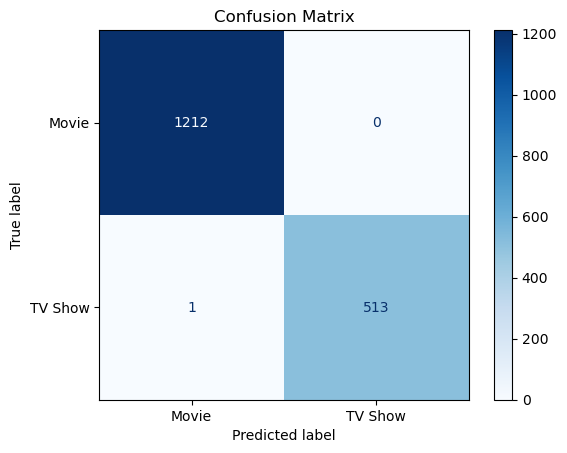

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)

# Plotting the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()


In [111]:
import pickle

# Save the model as a pickle file
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(logreg, f)

print("Model saved as logistic_model.pkl")


Model saved as logistic_model.pkl


In [113]:
# Load the model
with open("logistic_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Use the model
predictions = loaded_model.predict(X_test)
